In [88]:
## impports very important libraries run this cell first (TeaToCodeConverter)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
#import tensorflow as tf

# Data Imports

importing unlabeled  data as U1
importing labeled data as L1

In [89]:
u1 = pd.read_csv("../DataSets/Breast cancer dataset/breast-cancer-wisconsin.data",header=None,index_col=0)
l1 = pd.read_csv("../DataSets/Breast cancer dataset/breast-cancer-wisconsin.data",header=None, names=['id','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class'],index_col=0)
print("u1")
print(u1.head())
print("l1")
print(l1.head())


u1
         1   2   3   4   5   6   7   8   9   10
0                                              
1000025   5   1   1   1   2   1   3   1   1   2
1002945   5   4   4   5   7  10   3   2   1   2
1015425   3   1   1   1   2   2   3   1   1   2
1016277   6   8   8   1   3   4   3   7   1   2
1017023   4   1   1   3   2   1   3   1   1   2
l1
         clump_thickness  uniformity_of_cell_size  uniformity_of_cell_shape  \
id                                                                            
1000025                5                        1                         1   
1002945                5                        4                         4   
1015425                3                        1                         1   
1016277                6                        8                         8   
1017023                4                        1                         1   

         marginal_adhesion  single_epithelial_cell_size bare_nuclei  \
id                               

using Inbuilt tools for data description

In [90]:
u1.describe()
l1.describe()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [91]:
u1.shape
l1.shape


(699, 10)

In [92]:
print(f'clump_thickness: {l1.clump_thickness.count()}')

clump_thickness: 699


In [93]:
l1.columns

#unique values in each column

for i in l1.columns:
    print(f'{i}: {l1[i].nunique()}')

#check for null values
print("Check for null values")
print(l1.isnull().sum())

#find boundaries of each column
print("find boundaries of each column")
for i in l1.columns:
    print(f'{i}: {l1[i].min()} - {l1[i].max()}')




clump_thickness: 10
uniformity_of_cell_size: 10
uniformity_of_cell_shape: 10
marginal_adhesion: 10
single_epithelial_cell_size: 10
bare_nuclei: 11
bland_chromatin: 10
normal_nucleoli: 10
mitoses: 9
class: 2
Check for null values
clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64
find boundaries of each column
clump_thickness: 1 - 10
uniformity_of_cell_size: 1 - 10
uniformity_of_cell_shape: 1 - 10
marginal_adhesion: 1 - 10
single_epithelial_cell_size: 1 - 10
bare_nuclei: 1 - ?
bland_chromatin: 1 - 10
normal_nucleoli: 1 - 10
mitoses: 1 - 10
class: 2 - 4


In [94]:
#data types of each column

l1.dtypes

clump_thickness                 int64
uniformity_of_cell_size         int64
uniformity_of_cell_shape        int64
marginal_adhesion               int64
single_epithelial_cell_size     int64
bare_nuclei                    object
bland_chromatin                 int64
normal_nucleoli                 int64
mitoses                         int64
class                           int64
dtype: object

In [95]:
#general stats of each column

#variance

for i in l1.columns:
  if i != 'bare_nuclei':
    print(f'{i}: {l1[i].var()}')

##other method
#l1.drop('bare_nuclei',axis=1,inplace=True)

#for i in l1.columns: 
#   print(f'{i}: {l1[i].var()}')

#l1 = pd.read_csv("../DataSets/Breast cancer dataset/breast-cancer-wisconsin.data",header=None, names=['id','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class'],index_col=0)


clump_thickness: 7.928395456464618
uniformity_of_cell_size: 9.311402699722485
uniformity_of_cell_shape: 8.832265495939758
marginal_adhesion: 8.153190599751591
single_epithelial_cell_size: 4.903123988013986
bland_chromatin: 5.945620227012802
normal_nucleoli: 9.324679956220717
mitoses: 2.941492348873339
class: 0.9049194305413792


clump_thickness


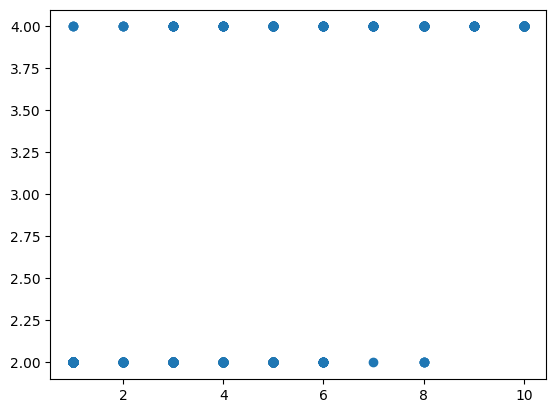

uniformity_of_cell_size


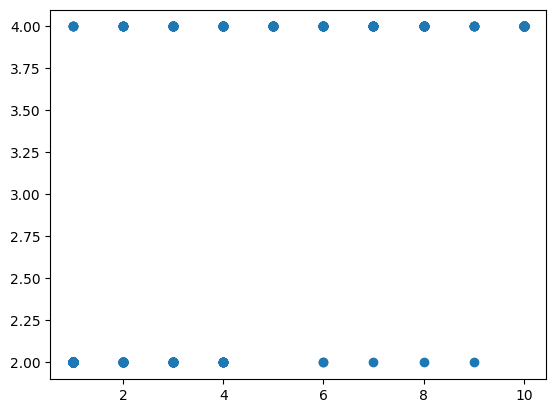

uniformity_of_cell_shape


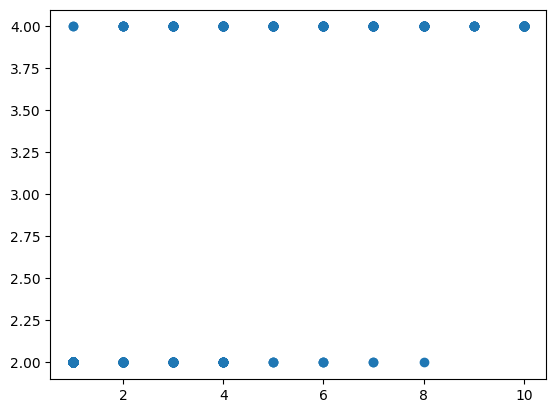

marginal_adhesion


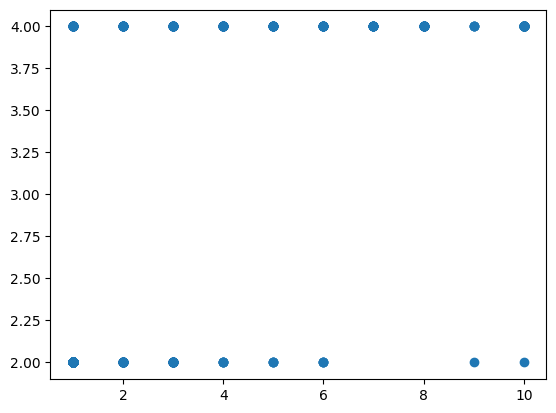

single_epithelial_cell_size


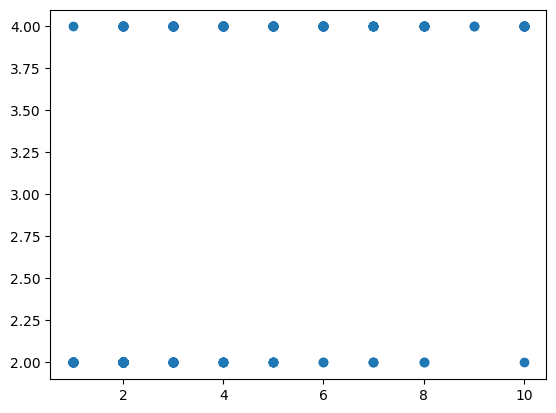

bare_nuclei


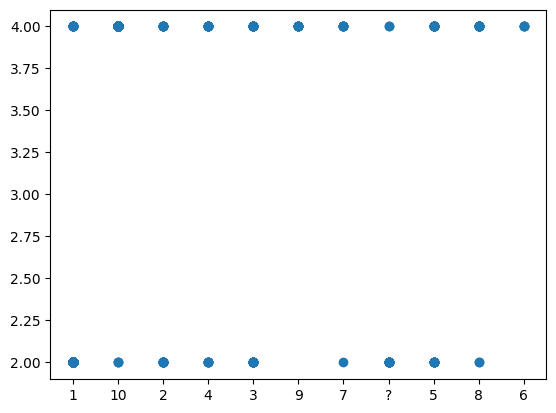

bland_chromatin


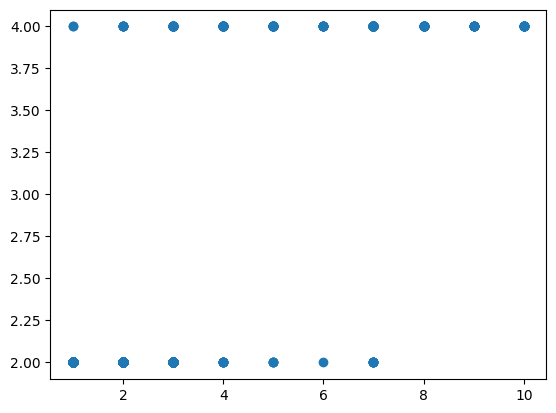

normal_nucleoli


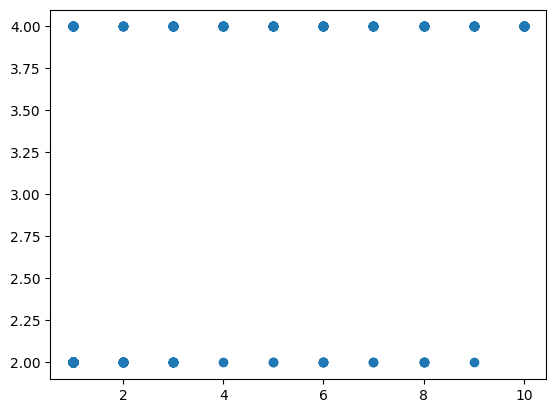

mitoses


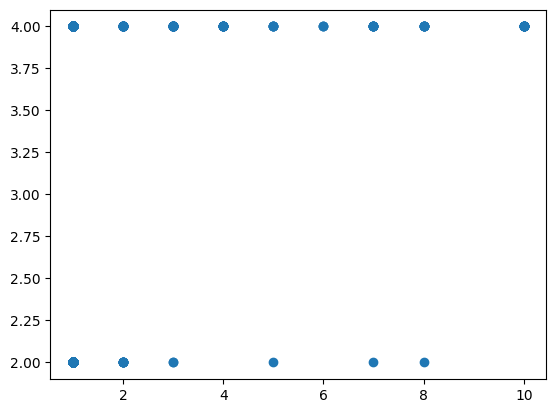

class


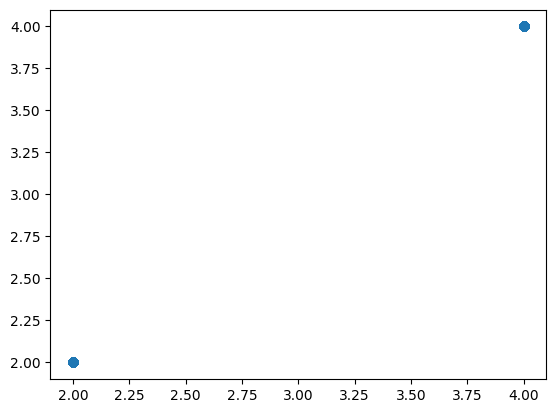

In [102]:
#l1.plot.scatter(l1.x,l1.y)
## Scatter graphs
for i in l1.columns:
    print(f'{i}')
    plt.scatter(l1[i], l1['class'])
    plt.show()


clump_thickness


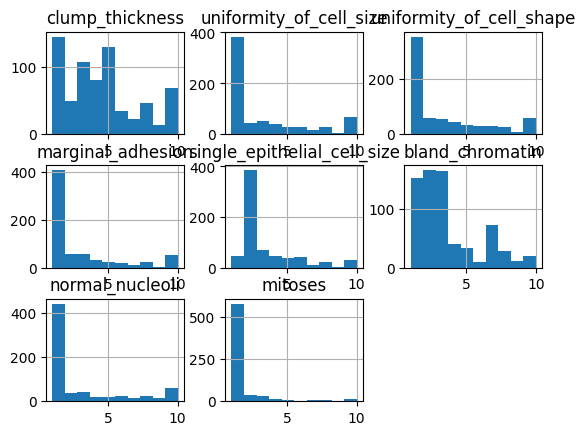

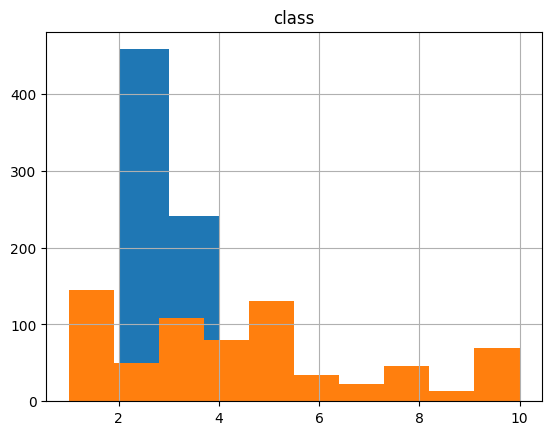

uniformity_of_cell_size


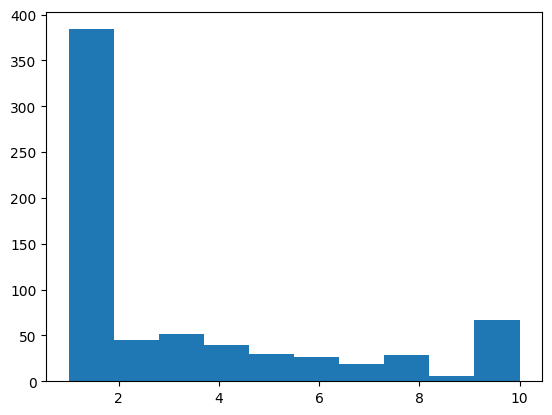

uniformity_of_cell_shape


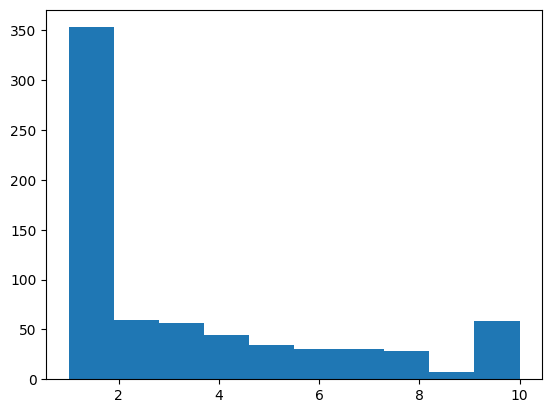

marginal_adhesion


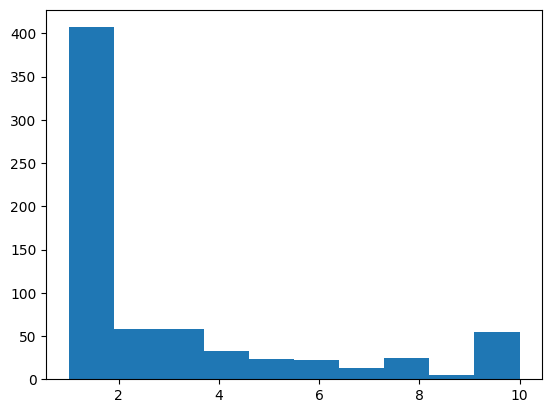

single_epithelial_cell_size


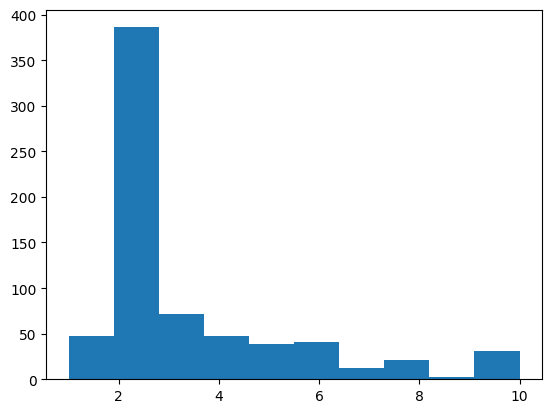

bare_nuclei


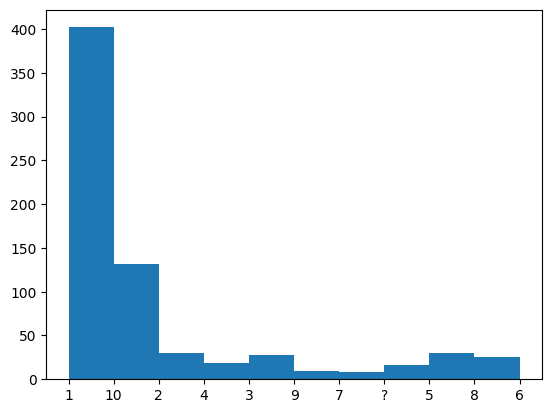

bland_chromatin


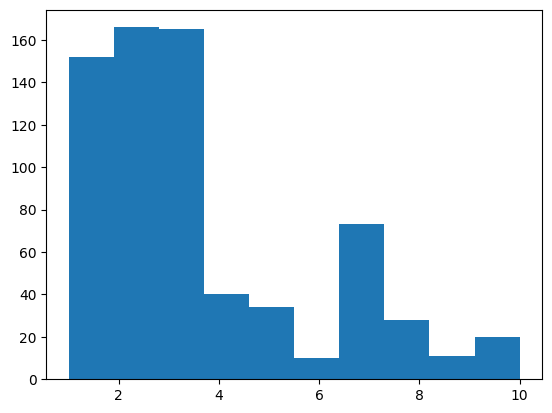

normal_nucleoli


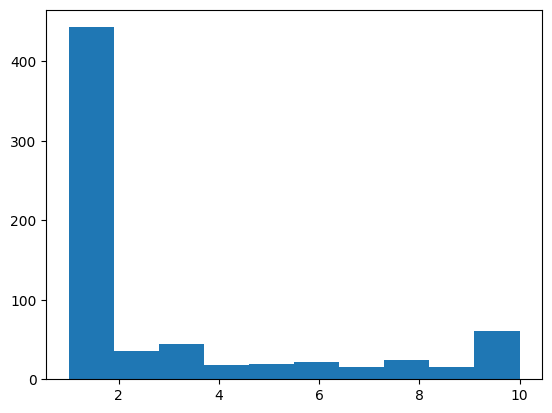

mitoses


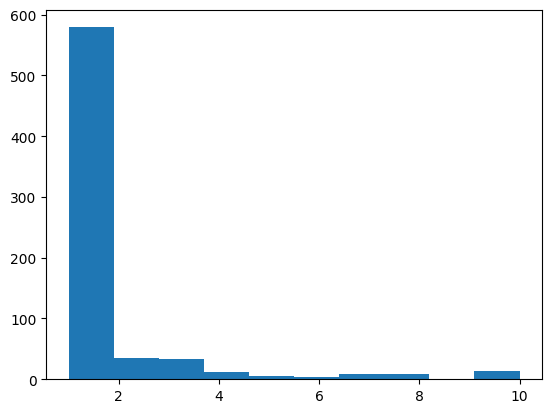

class


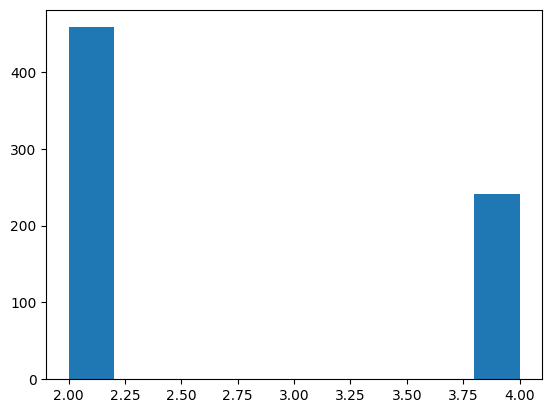

In [115]:
#histograms

#combined columns

l1.hist(column=['clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses'])

l1.hist(column=['class'],bins=2)

#seperate 
for i in l1.columns:
    print(f'{i}')
    plt.hist(l1[i])
    plt.show()
    